In [2]:
options(stringsAsFactors=F)
options(max.print=1000)
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggsci))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(circlize))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(corrplot))
suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(ggsignif))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ComplexHeatmap))
options(bitmapType = 'cairo', device = 'png')


setwd('/psycl/g/mpsziller/lucia/SCZ_PGC/eQTL_PROJECT')
tissues_name <- read.table('Tissues_all', h=F, stringsAsFactors = F)$V1

fold_cl <- 'clustering_res_matchUKBB_corrPCs/'
fold_notebook <- '/psycl/g/mpsziller/lucia/castom_cad_scz/jupyter_notebook/'
clust_res_file <- sprintf('%s%s/matchUKBB_tscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric_minimal.RData', fold_cl, tissues_name)
outFold <- sprintf('%sSCZ_clustering/', fold_notebook)
type_data <- 'tscore'
type_input <- 'zscaled'
type_cluster <- 'Cases'
pheno_name <- 'SCZ'
color_tissues <- read.table(sprintf('%scolor_tissues.txt', fold_notebook), header = T, stringsAsFactors = F)

clust_res <- list()
for(i in 1:length(tissues_name)){
    tmp <- get(load(clust_res_file[i]))
    clust_res[[i]] <- tmp$cl_best    
}

# load PC cluster:
clust_PCs <- get(load('clustering_res_matchUKBB_corrPCs/cluster_PCs/matchUKBB_PCs_clusterCases_PGmethod_HKmetric_minimal.RData'))

In [3]:
# function NMI plot
NMI_chisq_PCs <- function(tissues_name, clust_res, cl_PC, outFold, color_tissues){
    
    color_tissues <- color_tissues[match(tissues_name, color_tissues$tissues),]
    df_PCs_corrPCs <- data.frame(tissue = tissues_name, 
                              chisq_pvalue = sapply(clust_res, function(x) chisq.test(cl_PC$gr, x$gr)$p.value), 
                              NMI = sapply(clust_res, function(x) compare(cl_PC$gr, x$gr, method = 'nmi')))
                                       
    df_PCs_corrPCs$chisq_log_pvalue <- -log10(df_PCs_corrPCs$chisq_pvalue)                                 
    df_PCs_corrPCs$tissue <- factor(df_PCs_corrPCs$tissue, levels = rev(tissues_name))

    pl_chisq <- ggplot(df_PCs_corrPCs, aes(x = tissue, y = chisq_log_pvalue))+
      geom_bar(stat = 'identity', width = 0.5)+
      xlab('') + ylab('-log10(p-value)') + ggtitle('Chi-squared test:\nPCs vs corrPCs zscaled')+
      theme_bw() + 
      theme(title = element_text(size = 9), axis.text.y = element_text(colour = rev(color_tissues$color)), 
        axis.text.x = element_text(angle = 45, hjust = 1),)+
      coord_flip()

    pl_nmi <- ggplot(df_PCs_corrPCs, aes(x = tissue, y = NMI))+
      geom_bar(stat = 'identity', width = 0.5)+
      xlab('') + ylab('NMI') + ggtitle('NMI:\nPCs vs corrPCs zscaled')+
      theme_bw() + 
      theme(title = element_text(size = 9), axis.text.y = element_text(colour = rev(color_tissues$color)), 
        axis.text.x = element_text(angle = 45, hjust = 1),)+
      coord_flip()
    pl_tot <-  ggarrange(plotlist = list(pl_chisq, pl_nmi), ncol = 2, nrow = 1, align='h')
    print(pl_tot)
    ggsave(pl_tot, filename = sprintf('%scompare_zscaledcorrPCs_PCs_chisq_NMI.pdf', outFold),
       width = 8, height = 3, dpi=200)
                                           
    return(df_PCs_corrPCs)
}


compareNMI_random_cl <- function(id_t, n_rep, clust_res, cl_PC, NMI_original, outFold){

    nmi_random <- c()
    for(i in 1:n_rep){
        set.seed(i)
        rep_cl <- sample(clust_res[[id_t]]$gr)
        nmi_random <- c(nmi_random, compare(comm1 = rep_cl, cl_PC$gr, method = 'nmi'))
    }
    print('percentage of repetition s.t. actual NMI > random cl NMI')
    print(sum(NMI_original > nmi_random)/n_rep * 100)


    pdf(sprintf('%srandomCL_DLPC_compare_CLPCs_NMI.pdf', outFold), width = 4, height = 4)
    hist(nmi_random, xlim = c(0, max(c(NMI_original, nmi_random))))
    abline(v = NMI_original, col="red", lwd=3, lty=2)
    dev.off()

    hist(nmi_random, xlim = c(0, max(c(NMI_original, nmi_random))))
    abline(v = NMI_original, col="red", lwd=3, lty=2)

}                                           

Warning message in chisq.test(cl_PC$gr, x$gr):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(cl_PC$gr, x$gr):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(cl_PC$gr, x$gr):
“Chi-squared approximation may be incorrect”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


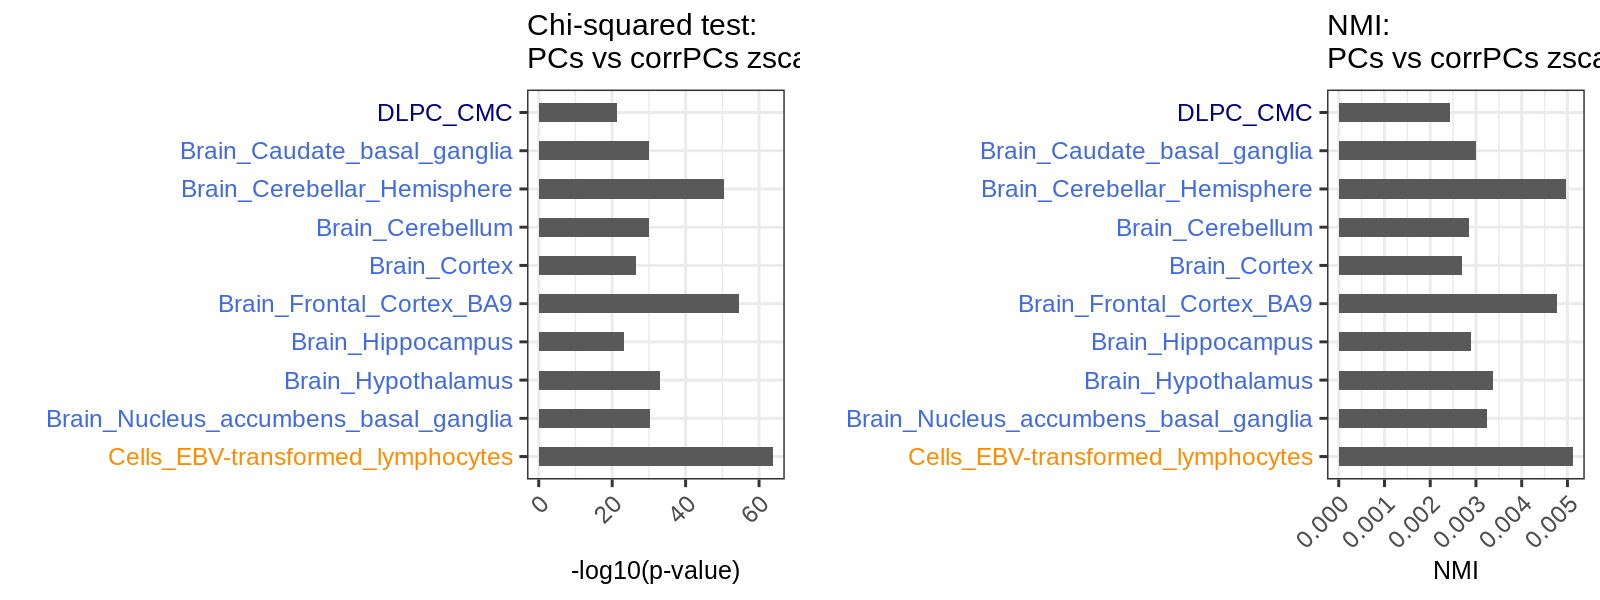

In [4]:
options(repr.plot.width = 8, repr.plot.height = 3, repr.plot.res = 200)

cl_PC <- clust_PCs$cl_best

df_PCs_corrPCs <- NMI_chisq_PCs(tissues_name = tissues_name,
                  clust_res = clust_res, 
                  cl_PC = cl_PC, outFold = outFold, 
                  color_tissues = color_tissues)


In [5]:
df_PCs_corrPCs

tissue,chisq_pvalue,NMI,chisq_log_pvalue
<fct>,<dbl>,<dbl>,<dbl>
DLPC_CMC,3.827766e-22,0.002426084,21.41705
Brain_Caudate_basal_ganglia,1.136104e-30,0.003007527,29.94458
Brain_Cerebellar_Hemisphere,4.162033e-51,0.004958440,50.38069
Brain_Cerebellum,7.449189e-31,0.002848263,30.12789
Brain_Cortex,2.927185e-27,0.002687883,26.53355
Brain_Frontal_Cortex_BA9,3.760735e-55,0.004772562,54.42473
Brain_Hippocampus,8.020750e-24,0.002885000,23.09579
Brain_Hypothalamus,7.526082e-34,0.003377990,33.12343
Brain_Nucleus_accumbens_basal_ganglia,4.064001e-31,0.003231608,30.39105


[1] "percentage of repetition s.t. actual NMI > random cl NMI"
[1] 100


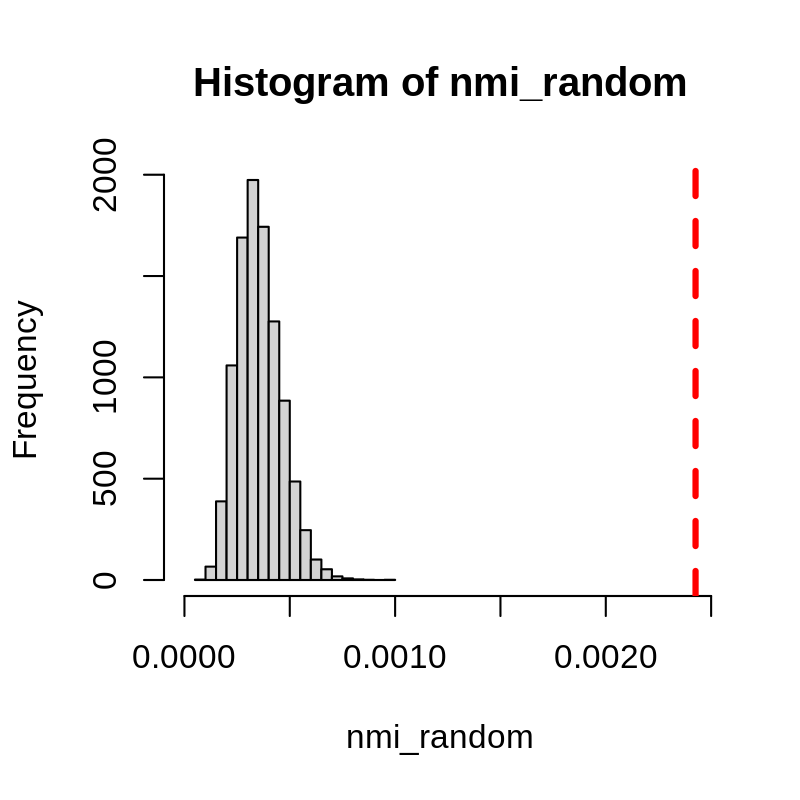

In [6]:
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 200)

id_dlpc <- which(tissues_name == 'DLPC_CMC')

compareNMI_random_cl(id_t = id_dlpc, n_rep = 10000, 
                     clust_res = clust_res, cl_PC = cl_PC, 
                     NMI_original =  df_PCs_corrPCs$NMI[id_dlpc], 
                     outFold = outFold)

In [7]:
df_PCs_corrPCs$NMI[id_dlpc]

[1] 0.002426084

NMI always lower in 10,000 randomization than what is reached by comparing actual clustering and PC clustering: 0.0024

In [8]:
OR_mat <- matrix(nrow = length(unique(clust_res[[id_dlpc]]$gr)), ncol = length(unique(cl_PC$gr)), NA)
pval_mat <- matrix(nrow = length(unique(clust_res[[id_dlpc]]$gr)), ncol = length(unique(cl_PC$gr)), NA)
colnames(pval_mat) <- colnames(OR_mat) <- paste0('cl_PCs:gr', 1:length(unique(cl_PC$gr)))
rownames(pval_mat) <- rownames(OR_mat) <- paste0('cl_corrPCs_zscaled:gr', 1:length(unique(clust_res[[id_dlpc]]$gr)))

for(i in 1:length(unique(clust_res[[id_dlpc]]$gr))){
    for(j in 1:length(unique(cl_PC$gr))){
        tmp1 <- as.numeric(clust_res[[id_dlpc]]$gr == i)
        tmp2 <- as.numeric(cl_PC$gr == j)
        OR_mat[i,j] <- fisher.test(table(tmp1, tmp2))$estimate
        pval_mat[i,j] <- fisher.test(table(tmp1, tmp2))$p.value
    }
}
OR_mat
pval_mat

,cl_PCs:gr1,cl_PCs:gr2,cl_PCs:gr3,cl_PCs:gr4,cl_PCs:gr5,cl_PCs:gr6,cl_PCs:gr7,cl_PCs:gr8,cl_PCs:gr9
cl_corrPCs_zscaled:gr1,0.9063474,1.0170515,0.9410988,1.1273620,1.0282353,0.7292327,0.8802216,1.2596407,1.1718522
cl_corrPCs_zscaled:gr2,1.2555005,0.9076927,1.0594573,1.0163856,0.8500089,0.4913871,0.5415232,0.7002409,0.9268041
cl_corrPCs_zscaled:gr3,0.9479576,1.0506481,1.0217173,0.8828743,1.0645381,1.8682545,1.5419746,0.9552962,0.9059369
cl_corrPCs_zscaled:gr4,0.9746414,0.9492219,1.0112407,0.9106484,1.1258436,1.3028345,1.1792146,1.2061382,0.8392581


,cl_PCs:gr1,cl_PCs:gr2,cl_PCs:gr3,cl_PCs:gr4,cl_PCs:gr5,cl_PCs:gr6,cl_PCs:gr7,cl_PCs:gr8,cl_PCs:gr9
cl_corrPCs_zscaled:gr1,1.489312e-03,0.7928175,0.0631221,0.0001693020,0.534907448,0.0586797569,4.588471e-02,0.004154288,0.0200027
cl_corrPCs_zscaled:gr2,1.056377e-09,0.2551001,0.1498651,0.6775046814,0.004321165,0.0024537895,2.938538e-12,0.001150863,0.3973321
cl_corrPCs_zscaled:gr3,8.463138e-02,0.4486339,0.5062675,0.0001162386,0.161216451,0.0000515376,2.011774e-12,0.598878682,0.1594830
cl_corrPCs_zscaled:gr4,8.406005e-01,0.9142614,0.9156703,0.4016816793,0.383491912,0.4437569945,3.583002e-01,0.426161192,0.5742207


png 
  2

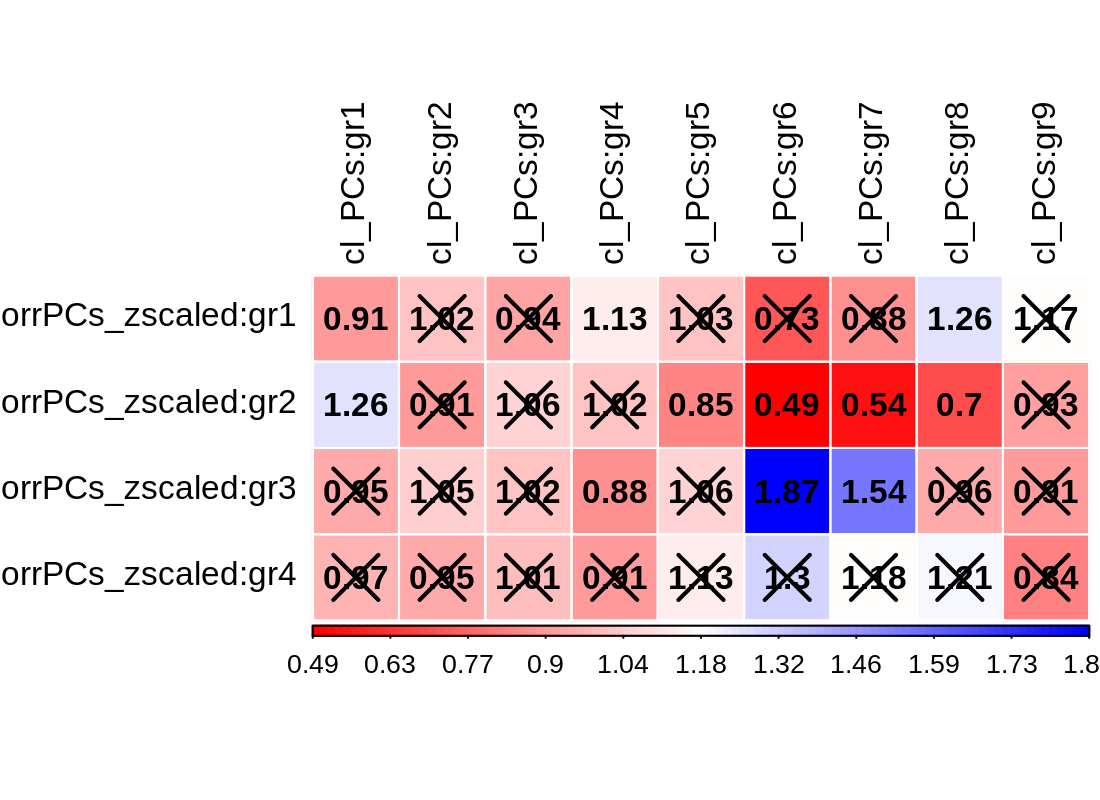

In [10]:
# plot enrichment clusters
library(corrplot)
library(RColorBrewer)

options(repr.plot.width = 5.5, repr.plot.height = 4, repr.plot.res = 200)

pdf(sprintf('%senrichmentCL_DLPC_in_CLPCs_Fisher.pdf', outFold), width = 5.5, height = 4)
corrplot(OR_mat, is.corr = FALSE, p.mat = pval_mat,  method = 'color', addgrid.col = 'white',  
         cl.pos = 'b', tl.col = 'black', cl.cex = 0.8, sig.level = 0.01, 
         col=colorRampPalette(c("red", "white", "blue"))(100), 
         addCoef.col = 'black')
dev.off()

corrplot(OR_mat, is.corr = FALSE, p.mat = pval_mat,  method = 'color', addgrid.col = 'white',  
         cl.pos = 'b', tl.col = 'black', cl.cex = 0.8, sig.level = 0.01, 
         col=colorRampPalette(c("red", "white", "blue"))(100), 
         addCoef.col = 'black')
#corrplot(OR_mat, is.corr = FALSE, p.mat = pval_mat,  method = 'color', addgrid.col = 'white',  
#         cl.pos = 'b', tl.col = 'black', cl.cex = 0.9, sig.level = 0.01, 
#        addCoef.col = 'black')

In [11]:
table(clust_res[[id_dlpc]]$gr, cl_PC$gr)/rowSums(table(clust_res[[id_dlpc]]$gr, cl_PC$gr))
table(cl_PC$gr)/sum(table(cl_PC$gr))

   
              1           2           3           4           5           6
  1 0.252962676 0.044855466 0.220511685 0.246317422 0.105659541 0.006091483
  2 0.301267542 0.041195111 0.235174287 0.235626981 0.092349479 0.004074242
  3 0.258126411 0.045711061 0.229232506 0.219751693 0.107674944 0.010383747
  4 0.259615385 0.042307692 0.228846154 0.217307692 0.115384615 0.009615385
   
              7           8           9
  1 0.045963008 0.033004762 0.044633957
  2 0.030104120 0.021729289 0.038478950
  3 0.062415350 0.028216704 0.038487585
  4 0.057692308 0.034615385 0.034615385


          1           2           3           4           5           6 
0.264467517 0.044421080 0.226924256 0.233276383 0.104087265 0.007447321 
          7           8           9 
0.049546590 0.029000745 0.040828843 

In [12]:
plot_comparison <- function(endo1, endo2, endo1_name, endo2_name, tissue, thr_pl_1 = 5,  thr_pl_2 = 5){
  
  pheno_id <- intersect(unique(endo1$pheno_id), unique(endo2$pheno_id))
  
  # get best result for each group
  endo1_best <- endo1 %>% 
    group_by(pheno_id) %>%  
    summarise(Field = Field[which.min(pvalue)], meaning = meaning[which.min(pvalue)],
              min_p = min(pvalue), best_z = z[which.min(pvalue)], 
              gr = comp[which.min(pvalue)], BH_corr = pval_corr[which.min(pvalue)] <=0.05) %>%
    mutate(log10p = -log10(min_p))
  
  endo2_best <- endo2 %>% 
    group_by(pheno_id) %>%  
    summarise(Field = Field[which.min(pvalue)], meaning = meaning[which.min(pvalue)],
              min_p = min(pvalue), best_z = z[which.min(pvalue)], 
              gr = comp[which.min(pvalue)], BH_corr = pval_corr[which.min(pvalue)] <=0.05) %>%
    mutate(log10p = -log10(min_p)) 
  
  combined <- endo1_best %>% full_join(endo2_best, 
                                       c("pheno_id" = "pheno_id")) %>% drop_na(min_p.x) %>% drop_na(min_p.y)
  combined <- combined %>% 
    mutate(label = ifelse(is.na(meaning.x), paste(Field.x),paste(Field.x, meaning.x, sep = '\n'))) 
  combined$sign <- 'FDR > 0.05'
  combined$sign[combined$BH_corr.y] <- sprintf('FDR < 0.05 (%s)', endo2_name)
  combined$sign[combined$BH_corr.x] <- sprintf('FDR < 0.05 (%s)', endo1_name)
  combined$sign[combined$BH_corr.y & combined$BH_corr.x] <- sprintf('FDR < 0.05 (%s & %s)', 
                                                                    endo1_name, endo2_name)
  combined$label_plot <- combined$label
  if(endo1_name == 'PCs'){
    combined$label_plot[!combined$sign %in% c(sprintf('FDR < 0.05 (%s)', endo2_name), 
                                              sprintf('FDR < 0.05 (%s & %s)', endo1_name, endo2_name)) & combined$log10p.x < thr_pl_2] <- ""
  }else{
    combined$label_plot[!combined$sign %in% c(sprintf('FDR < 0.05 (%s)', endo1_name),
                                              sprintf('FDR < 0.05 (%s)', endo2_name), 
                                              sprintf('FDR < 0.05 (%s & %s)', endo1_name, endo2_name))] <- ""  
  }
  combined$label_plot[!combined$sign %in% c(sprintf('FDR < 0.05 (%s)', endo1_name), 
                                              sprintf('FDR < 0.05 (%s & %s)', endo1_name, endo2_name)) & combined$log10p.y < thr_pl_1] <- ""
  combined$sign <- factor(combined$sign, 
                          levels = c( 'FDR > 0.05', sprintf('FDR < 0.05 (%s)', endo1_name),
                                     sprintf('FDR < 0.05 (%s)', endo2_name), 
                                     sprintf('FDR < 0.05 (%s & %s)', endo1_name, endo2_name)))
  
  pl <- ggplot(combined, aes(x = log10p.x, y = log10p.y, color = sign, label = label_plot))+
    geom_point(size = 1) + 
    geom_text_repel(size = 3,  max.overlaps = 30, force = 10)+
    geom_vline(xintercept = -log10(0.001), color = 'black', linetype = 'dashed') + 
    geom_hline(yintercept = -log10(0.001), color = 'black', linetype = 'dashed') + 
    #annotate("text", x=-Inf, y=Inf, hjust=-0.2, vjust=1.2, 
    #         label = paste0("R2 = ", round(cor(combined$log10p.x, combined$log10p.y), digits = 3)))+
    xlab(sprintf('clustering from %s', endo1_name)) + 
    ylab(sprintf('clustering from %s', endo2_name)) + 
    ggtitle(tissue)+
    theme_bw() + theme(legend.position = 'right') +
    scale_color_manual(values = c('grey80', 'red', 'blue', 'purple'))
 
  ggsave(pl, filename = sprintf('%s/%s_endophenotype_%s_%s.pdf', outFold, tissue, endo1_name, endo2_name),
         width = 8, height = 5.5, dpi=200)
  
    return(pl)

}


Rows: 9000 Columns: 14

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): pheno_id, Field, meaning, type_pheno, comp
dbl (9): beta, se_beta, z, pvalue, OR_or_Beta, CI_low, CI_up, pval_corr, pva...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 4000 Columns: 14

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): pheno_id, Field, meaning, type_pheno, comp
dbl (9): beta, se_beta, z, pvalue, OR_or_Beta, CI_low, CI_up, pval_corr, pva...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


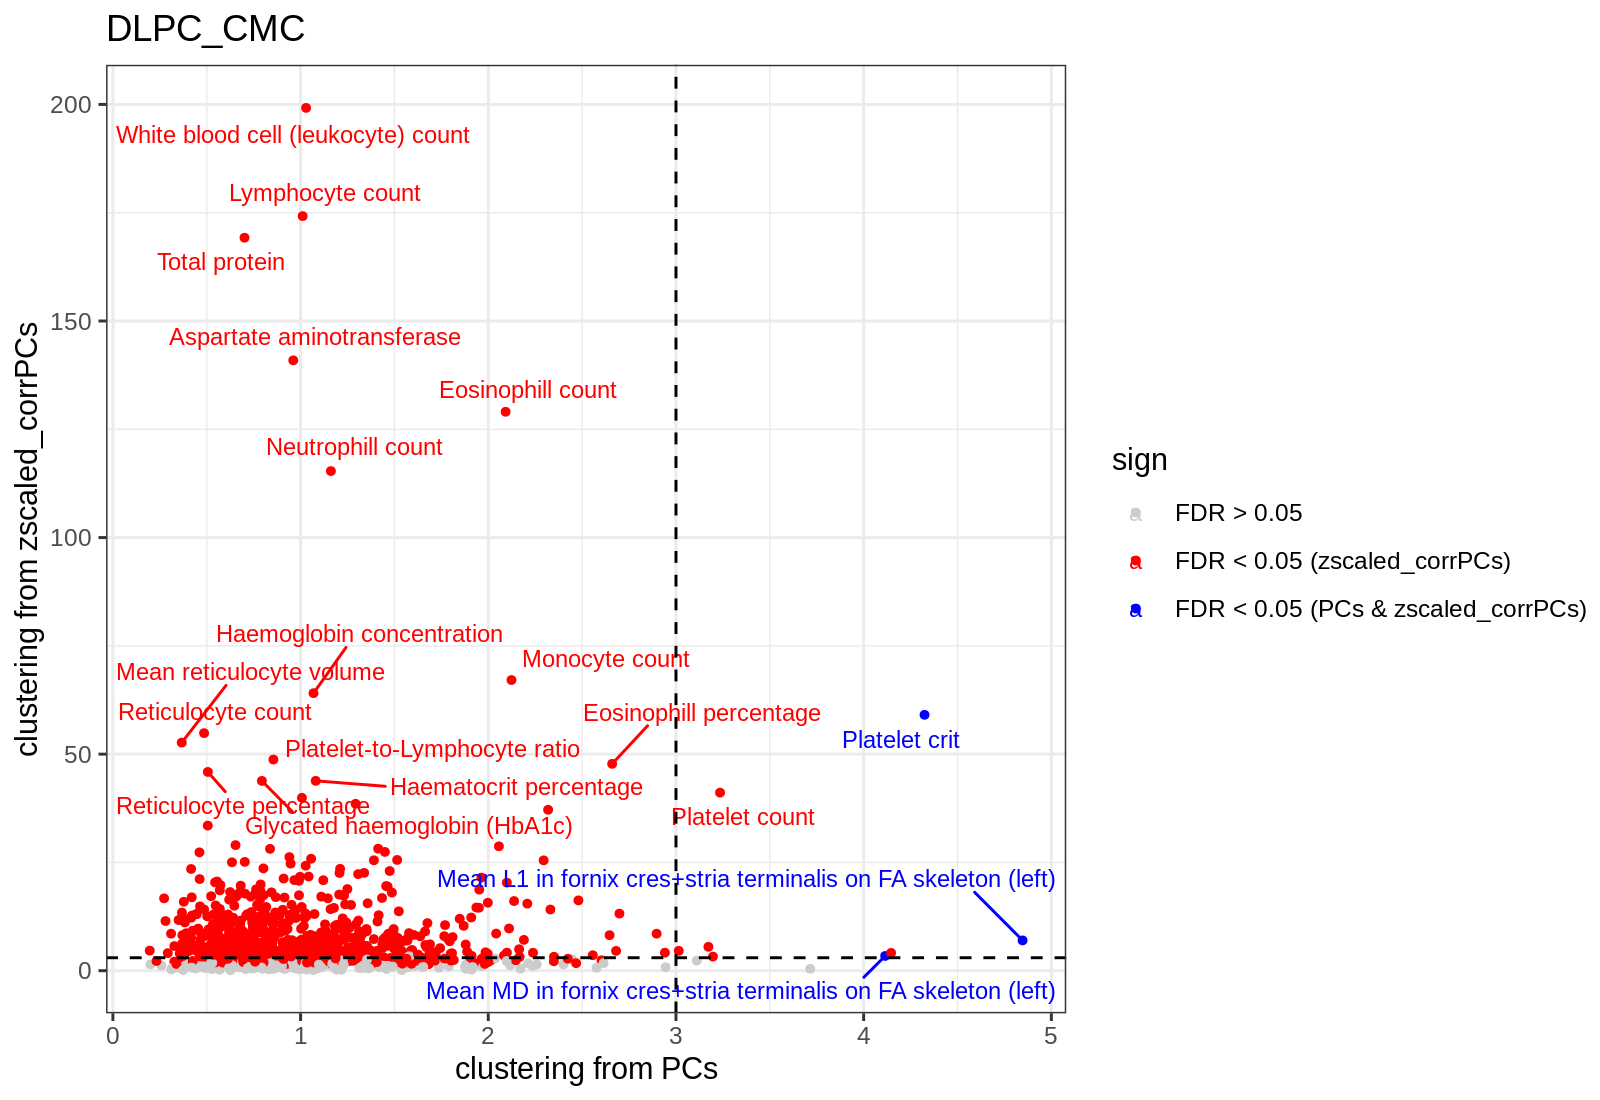

In [13]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)

n_tissues <- length(tissues_name)
file <- sprintf('clustering_res_matchUKBB_corrPCs/%s/', tissues_name[id_dlpc])

zscaled_corrPCs <- vector(length = n_tissues, mode = 'list')
endop_res_PCs <- read_tsv('clustering_res_matchUKBB_corrPCs/cluster_PCs/matchUKBB_riskScores_PCs_original_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM.txt')
zscaled_corrPCs[[id_dlpc]] <- read_tsv(sprintf('%smatchUKBB_riskScores_tscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM.txt', file))

plot_comparison(endo2 = zscaled_corrPCs[[id_dlpc]], endo1 = endop_res_PCs,  tissue = tissues_name[id_dlpc],
                  endo1_name = 'PCs', endo2_name = 'zscaled_corrPCs', thr_pl_1 = 40, thr_pl_2 = 0)  

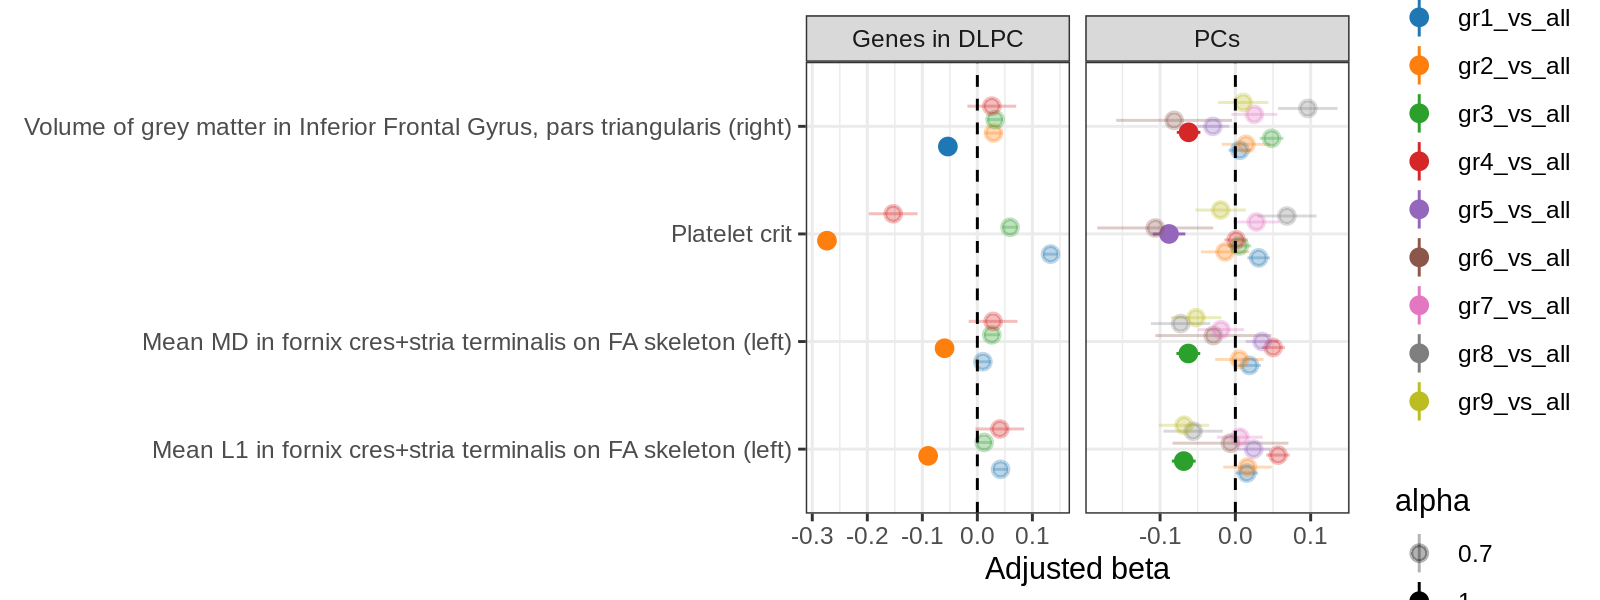

In [18]:
options(repr.plot.width = 8, repr.plot.height = 3, repr.plot.res = 200)

library(ggsci)
pheno_name <- endop_res_PCs$pheno_id[endop_res_PCs$pval_corr <= 0.1] 
df_PCs <- endop_res_PCs %>% filter(pheno_id %in% pheno_name)
df_endo <- zscaled_corrPCs[[id_dlpc]] %>% filter(pheno_id %in% pheno_name)

df_PCs <- df_PCs %>% 
    mutate(label = ifelse(is.na(meaning), paste(Field),paste(Field, meaning, sep = '\n')), alpha = '0.7') 
df_PCs <- df_PCs %>% group_by(Field) %>% 
    mutate(alpha = case_when(pvalue == min(pvalue) ~ '1', TRUE ~ alpha)) 

df_endo <- df_endo %>% 
    mutate(label = ifelse(is.na(meaning), paste(Field),paste(Field, meaning, sep = '\n')),  alpha = '0.7') 
df_endo <- df_endo %>% group_by(Field) %>% 
    mutate(alpha = case_when(pvalue == min(pvalue) ~ '1', TRUE ~ alpha)) 


df_PCs$type <- 'PCs'
df_endo$type <- 'Genes in DLPC'
df <- rbind(df_PCs, df_endo)

pl <- ggplot(df, aes(x = label, y= beta, color = comp, alpha = alpha)) +
    geom_pointrange(aes(ymin=beta-se_beta, ymax=beta+se_beta), 
                    position = position_dodge(width = 0.5)) + 
    facet_wrap(.~type, scales = 'free_x', nrow = 1) + 
    scale_color_d3() + 
    scale_alpha_manual(values = c(0.3, 1))+
    geom_hline(yintercept = 0, linetype = 'dashed')+
    theme_bw() + xlab("") + ylab("Adjusted beta") + 
    
    coord_flip()
pl
    
ggsave(pl, filename = sprintf('%s/common_sign_endophenotype_PCs_DLPC_signPCs.pdf', outFold),
         width = 8, height = 3, dpi=200)

In [17]:
df[df$type == 'PCs' & df$pheno_id %in% pheno_name & df$comp == 'gr4_vs_all',]

pheno_id,Field,meaning,beta,se_beta,z,pvalue,OR_or_Beta,CI_low,CI_up,type_pheno,pval_corr,comp,pval_corr_overall,label,alpha,type
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
25143,Mean MD in fornix cres+stria terminalis on FA skeleton (left),NA,0.0502105074,0.01564705,3.20894494,1.334071e-03,0.0502105074,0.01954286,0.08087815,CONTINUOUS,0.44469018,gr4_vs_all,1,Mean MD in fornix cres+stria terminalis on FA skeleton (left),0.7,PCs
25239,Mean L1 in fornix cres+stria terminalis on FA skeleton (left),NA,0.0567109164,0.01564607,3.62461038,2.900263e-04,0.0567109164,0.02604518,0.08737665,CONTINUOUS,0.14501315,gr4_vs_all,1,Mean L1 in fornix cres+stria terminalis on FA skeleton (left),0.7,PCs
25791,"Volume of grey matter in Inferior Frontal Gyrus, pars triangularis (right)",NA,-0.0621470883,0.01564517,-3.97228648,7.140449e-05,-0.0621470883,-0.09281105,-0.03148312,CONTINUOUS,0.07140449,gr4_vs_all,1,"Volume of grey matter in Inferior Frontal Gyrus, pars triangularis (right)",1,PCs
30090,Platelet crit,NA,0.0009656883,0.01565057,0.06170306,9.507998e-01,0.0009656883,-0.02970887,0.03164025,CONTINUOUS,0.99554556,gr4_vs_all,1,Platelet crit,0.7,PCs


- We plot anything in PCs with FDR  < 0.1, the highlethied one is the group with highest significance.
- Note that group 2 in DLPC and gr5 in PCs are depleated but they have the same endophenotypic effect for platelet crit
- Note that gr1 in DLPC and gr4 in PCs are enriched and they have the same effect on volume of grery matter (only common thing)
- Note that gr2 in DLPC and gr3 in PCs do not have enrich/depletion relationship
- conclusion: there is some effect left from PCs we were not able to differentiate but doesn't drive the endophenotypic association!